## LAW OF LARGE NUMBERS ON MULTIPLE CHOICE TESTS

### INTRODUCTION
For a multiple choice exam to be fair, testwriters cannot have any bias towards a particular answer choice. For instance, if a  teacher's exams tend to significantly favor choice 'C' (or '3') as the correct answer, students would eventually recognize it and the bias would affect their choice-making process on subsequent exams. 

This does not mean that in order for an exam to be fair, all answer choices must be correct an equal amount of times. It does mean, however, that over a series of exams, we would see all answer choices represented equally, in aggregate. This is due to the **Law of Large Numbers** -- over a large number of trials, the outcome should approach the abstract probability. So if there was no real bias to begin with, eventually all answers would become equally represented over time.

In this exercise, we'll test answer keys of 28 real New York State standardized exams (14 English exams and 14 math) for bias. We'll also leverage Pandas to randomly generate a set of 14 mock exam answer keys (which we'll call 'randomset') so we can compare the real data to a dataset we know with certainty is random and has no bias.

Each test has 24 questions and four answer choices per question (1, 2, 3, and 4). This hypothetically allows for a perfect distribution of 6 correct answers per choice on each test.

### 1 - GETTING THE DATA
First, we'll import the pandas and numpy libraries. Then we'll load data from the 28 real tests. Each exam will have its own index. 

In [8]:
import pandas as pd
import numpy as np
realdf = pd.read_csv("https://raw.githubusercontent.com//NickKrausStack//testrandomness//main//AnswerKeyMaster.csv")
realdf.index += 1
realdf.index.name = 'Questions'
print(realdf)

           TestID TestName  Answer
Questions                         
1               1     Math       4
2               1     Math       3
3               1     Math       2
4               1     Math       3
5               1     Math       3
...           ...      ...     ...
668            28  English       4
669            28  English       4
670            28  English       3
671            28  English       1
672            28  English       4

[672 rows x 3 columns]


In the dataframe, each row represents one question, with the actual multiple choice answer in the last column. 

Now, for comparison, we'll generate a randomized data set of answer choices for 14 fictional tests. The data will be formatted in the same way as the real data was, with 'randomset' as the name of the test. 

For convenience, we'll combine them into the dataframe we used for the real tests.

In [9]:
ids = np.repeat(np.arange(29, 43), 24)
random_numbers = np.random.randint(1, 5, size=len(ids))
gendf = pd.DataFrame({'TestID': ids, 'TestName':"randomset",'Answer': random_numbers})
combined_df = pd.concat([realdf, gendf], ignore_index=True)
combined_df.index += 1
combined_df.index.name = 'QuestionID'

Here's how the combined dataframe looks:

In [3]:
print(combined_df)

            TestID   TestName  Answer
QuestionID                           
1                1       Math       4
2                1       Math       3
3                1       Math       2
4                1       Math       3
5                1       Math       3
...            ...        ...     ...
1004            42  randomset       2
1005            42  randomset       3
1006            42  randomset       4
1007            42  randomset       3
1008            42  randomset       4

[1008 rows x 3 columns]


## 2 - TESTING THE AVERAGE ANSWER VALUE OF EACH EXAM
The first method we'll use to test distribution of answer scores is the average of answer value. If an exam's answers are equally distributed, the average of all answers should be 2.5. This is because the average of 1,2,3, and 4 is 2.5. 

To check each individual exam for its answer value average, we'll create a new dataframe called avgdf. We'll populate it by using a custom function, take_avg:

In [5]:
avgdf = pd.DataFrame(columns=['TestName','avg'])

def take_avg(x):
    tests = x['TestID'].unique().tolist()
    for test in tests:
        filter = x.loc[(x['TestID']==test)]
        filtered = filter['Answer']
        name = filter['TestName'].unique().item()
        countt = name
        avg = filtered.mean()
        avgdf.loc[len(avgdf)] = [name, avg]
    avgdf.index += 1
    avgdf.index.name = 'QuestionID'
    print(avgdf)
    
take_avg(combined_df)

             TestName       avg
QuestionID                     
1                Math  2.666667
2                Math  2.416667
3                Math  2.416667
4                Math  2.541667
5                Math  2.500000
6                Math  2.708333
7                Math  2.583333
8                Math  2.791667
9                Math  2.375000
10               Math  2.666667
11               Math  2.541667
12               Math  2.375000
13               Math  2.583333
14               Math  2.416667
15            English  2.416667
16            English  2.458333
17            English  2.416667
18            English  2.625000
19            English  2.333333
20            English  2.500000
21            English  2.500000
22            English  2.416667
23            English  2.458333
24            English  2.625000
25            English  2.500000
26            English  2.583333
27            English  2.375000
28            English  2.625000
29          randomset  2.375000
30      

Glancing through the third column, it seems like most exams are in the vicinity of 2.5. Among the real exams, 2 of them had a perfect distribution of 2.5. Among the Pandas-generated exams, three had an average of 2.5 However, note that with the fictional tests, there seems to be more variability, with test 31 clocking in at 1.875. This means that that test favored answers 1 or 2. 

This provides a sense that many tests individually are pretty fairly distributed, but not all. 

## 3 - VISUALIZATION: HISTOGRAM SUBPLOT
To evaluate if the Law of Large Numbers plays a role, we can examine the distribution behavior on a broader scale. One way to do this is to simply evaluate the overall average and standard deviation for each eaxm type, rather than for each exam.

To do this, we import matplotlib (and use numpy) to construct histograms in a subplot for each exam -- the math, the English, and the randomly-generated. We'll loop through a list of these exams to create each histogram, in succession.

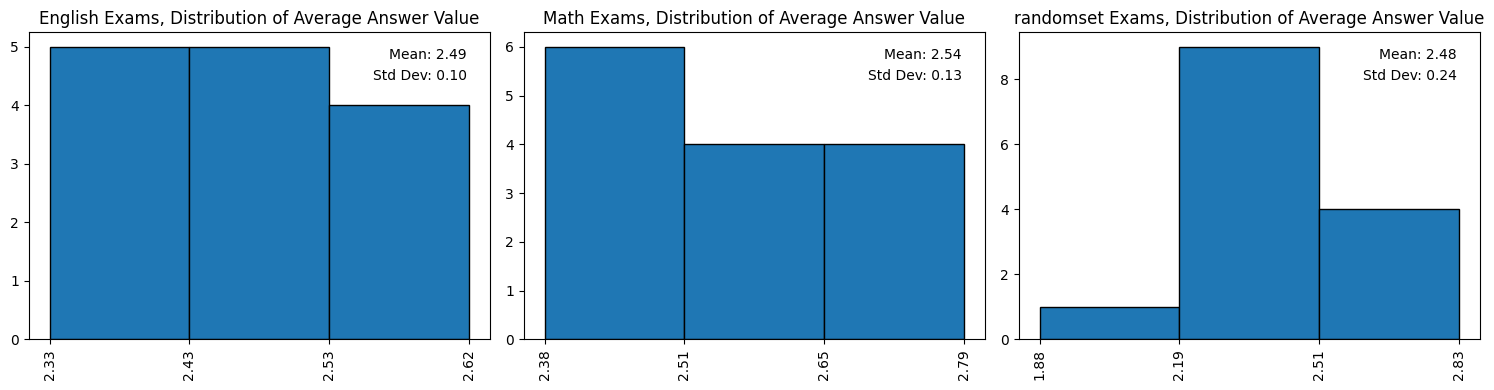

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
exams = ['English','Math' , 'randomset']
    
for var in range(len(exams)):
    filtdf = avgdf.loc[avgdf['TestName'] == exams[var], 'avg']
    n, bins, patches = axes[var].hist(filtdf, bins=3, edgecolor='black')
    axes[var].set_title(exams[var] + " Exams, Distribution of Average Answer Value")
    axes[var].set_xticks(bins)
    axes[var].set_xticklabels(np.around(bins, decimals=2), rotation=90, ha='center')
    
    mean = filtdf.mean()
    std = filtdf.std()
    axes[var].text(0.95, 0.95, f"Mean: {mean:.2f}", ha='right', va='top', transform=axes[var].transAxes)
    axes[var].text(0.95, 0.88, f"Std Dev: {std:.2f}", ha='right', va='top', transform=axes[var].transAxes)

plt.tight_layout()
plt.show()

All 3 overall averages fall close to 2.5. But notice that the Pandas-Generated answer key has a much wider standard deviation, indicating that there is more variability among individual exams, as we noted earlier. However, any strong deviation from the 2.5 mean has been swallowed up by the overall average, which rounds to 2.5 for each of the 3 exam types.

## 4 - VISUALIZATION: LINE PLOT
The histogram visualization shows a static average of each exam-type. But we can get a more dynamic sense of how (or if) the Law of Large Numbers really figures into this by creating a cumulative average graph that shows how the average changes as the data sample gets larger.

We can visualize this in a standard line graph with an added line of best fit for further illustration of the overall trend. We'll again use a for-loop to generate graphs for each of the exams:

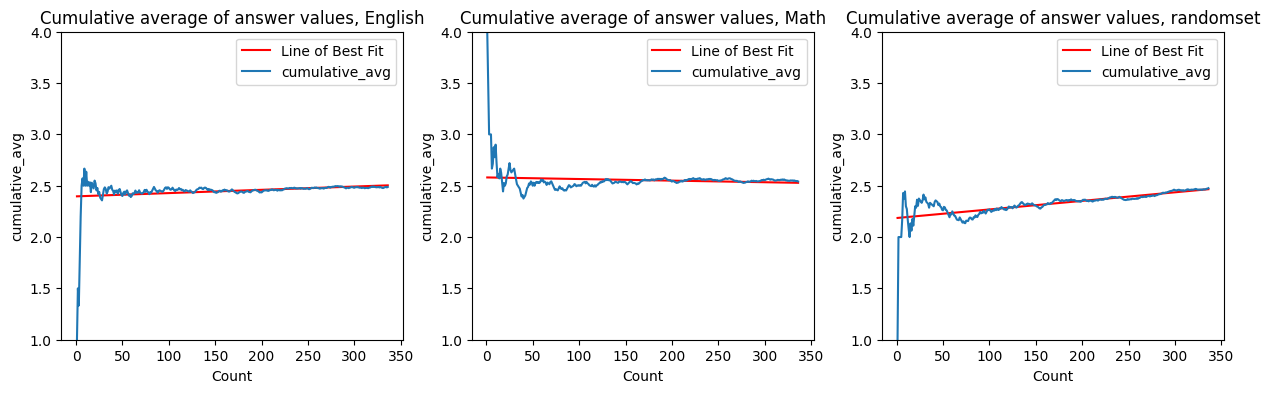

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
exams = ['English','Math' , 'randomset']


for var in range(len(exams)):
    filtdf = pd.DataFrame()
    filtdf['Answer'] = combined_df.loc[combined_df['TestName'] == exams[var], 'Answer']
    filtdf['Count'] = range(1, len(filtdf) + 1)
    filtdf['cumulative_avg'] = filtdf['Answer'].cumsum() / np.arange(1, len(filtdf) + 1)
    coefficients = np.polyfit(filtdf['Count'], filtdf['cumulative_avg'], deg=1)
    m = coefficients[0]  
    b = coefficients[1] 
    line_of_best_fit = m * filtdf['Count'] + b
    axes[var].plot(filtdf['Count'], line_of_best_fit, color='red', label='Line of Best Fit')
    axes[var].plot('Count', 'cumulative_avg', data=filtdf)
    axes[var].set_xlabel('Count')
    axes[var].set_ylabel('cumulative_avg')
    axes[var].set_title('Cumulative average of answer values, '+ exams[var])
    axes[var].set_ylim(1, 4) 
    axes[var].legend()
    
plt.show()        

For all 3 tests, the cumulative average certainly trends toward 2.5 as the data sample gets larger, as can be seen. This demonstrates that the Law of Large Numbers worked in this environment, and that there was likely no bias to begin with. 

There is also a more nuanced observation we might make. The English and math exams achieved cumulative averages in the 2.5 range faster than the Pandas-generated exams did, as can be seen from the general shape of the cumulative_avg lines. The lines of best fit tell the same story. The lines of best fit for the Pandas data is markedly steeper, showing that there was more change in the average as the count progressed. With the real exams, the lines of best fit are relatively flat because their average quickly conformed to the 2.5 vicinity and then only got slightly closer as the count progressed. 

Possibly, the writers of the real exams manually forced the distribution to be relatively even, whereas a randomizing mechanism like the one we used allowed for a bit more variability before the Law of Large Numbers kicked in.

## CONCLUSION
We have demonstrated that the average value for each of 28 real exams tends to be in the general vicinity of 2.5, which would represent perfect distribution. The overall average for each exam type -- math and English -- is very close to 2.5. Using cumulative average, we can see the Law of Large Numbers at play. As more data is taken into account, the average approaches the ideal distribution, 2.5. All this gives us reason to suggest that the exams in question are fair and unbiased in terms of the answer-choice selection process. We also note that similar data that has been randomly generated actually tended to be less evenly distributed than the real exams, with slightly more deviation. 